In [79]:
import warnings
warnings.filterwarnings('ignore')

In [5]:
import pandas as pd

In [9]:
pd.read_csv("20250327102754_관광객 지역별 방문비율 CSV 다운로드.csv",encoding='utf-8-sig')

,시도명,시도 방문자 비율,시군구명,시군구 방문자 비율
0,강원특별자치도,2.11,양양군,0.07
1,강원특별자치도,2.11,고성군,0.05
2,강원특별자치도,2.11,인제군,0.04
3,강원특별자치도,2.11,양구군,0.01
4,강원특별자치도,2.11,화천군,0.02
...,...,...,...,...
248,충청북도,1.80,충주시,0.14
249,충청북도,1.80,청주시 청원구,0.25
250,충청북도,1.80,청주시 흥덕구,0.21
251,충청북도,1.80,청주시 서원구,0.10


In [180]:
data_s = pd.read_csv("20250327102754_관광객 지역별 방문비율 CSV 다운로드.csv",encoding='utf-8-sig')

In [182]:
data_s.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253 entries, 0 to 252
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   시도명         253 non-null    object 
 1   시도 방문자 비율   253 non-null    float64
 2   시군구명        253 non-null    object 
 3   시군구 방문자 비율  253 non-null    float64
dtypes: float64(2), object(2)
memory usage: 8.0+ KB


In [15]:
import matplotlib.pyplot as plt

In [23]:
import seaborn as sns

In [31]:
plt.rc('font',family='D2Coding')

In [184]:
data_s.groupby('시도명')['시도 방문자 비율'].sum().sort_values(ascending=False).reset_index().head(5)

data_s.reset_index()

,index,시도명,시도 방문자 비율,시군구명,시군구 방문자 비율
0,0,강원특별자치도,2.11,양양군,0.07
1,1,강원특별자치도,2.11,고성군,0.05
2,2,강원특별자치도,2.11,인제군,0.04
3,3,강원특별자치도,2.11,양구군,0.01
4,4,강원특별자치도,2.11,화천군,0.02
...,...,...,...,...,...
248,248,충청북도,1.80,충주시,0.14
249,249,충청북도,1.80,청주시 청원구,0.25
250,250,충청북도,1.80,청주시 흥덕구,0.21
251,251,충청북도,1.80,청주시 서원구,0.10


In [186]:
top5 = data_s.groupby('시도명')['시도 방문자 비율'].sum().sort_values(ascending=False).reset_index().head(5)
top5

,시도명,시도 방문자 비율
0,서울특별시,701.75
1,경기도,656.48
2,인천광역시,147.60
3,부산광역시,125.76
4,경상남도,116.38


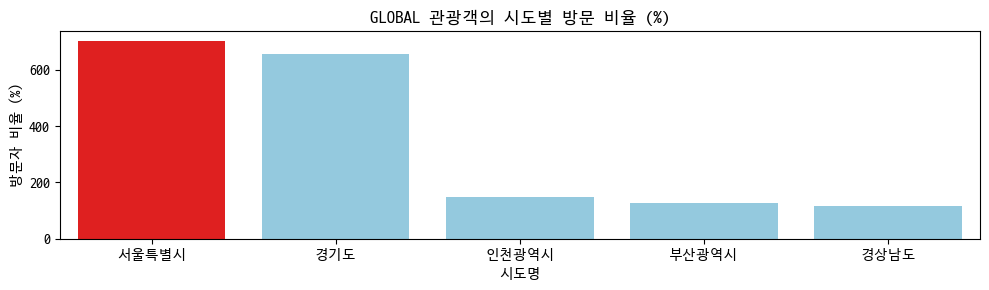

In [190]:
# 색상 리스트: 첫 번째(1등)만 빨간색, 나머지는 파란색
colors = ['red'] + ['skyblue'] * (len(top5) - 1)

# 그래프 그리기
plt.figure(figsize=(10, 3))
sns.barplot(data=top5, x='시도명', y='시도 방문자 비율', palette=colors)

plt.title('GLOBAL 관광객의 시도별 방문 비율 (%)')
plt.xlabel('시도명')
plt.ylabel('방문자 비율 (%)')
plt.tight_layout()
plt.show()

In [196]:
# 1. 서울특별시만 필터링
seoul_data = data_s[data_s['시도명'] == '서울특별시']

# 2. 시군구 방문자 비율 기준 내림차순 정렬
seoul_sorted = seoul_data.sort_values(by='시군구 방문자 비율', ascending=False)

In [198]:
seoul_sorted

,시도명,시도 방문자 비율,시군구명,시군구 방문자 비율
165,서울특별시,28.07,중구,8.79
166,서울특별시,28.07,종로구,4.36
153,서울특별시,28.07,마포구,3.93
144,서울특별시,28.07,강남구,3.31
164,서울특별시,28.07,용산구,2.99
148,서울특별시,28.07,영등포구,1.67
151,서울특별시,28.07,강서구,1.56
145,서울특별시,28.07,서초구,1.51
154,서울특별시,28.07,서대문구,1.40
163,서울특별시,28.07,성동구,1.27


In [200]:
import json

type(open('HangJeongDong_ver20241001.geojson','r',encoding='utf-8'))
jsonfile = open('HangJeongDong_ver20241001.geojson','r',encoding='utf-8').read()
type(jsonfile)

str

In [204]:
jsonfile = open('HangJeongDong_ver20241001.geojson','r',encoding='utf-8').read()
jsonData = json.loads(jsonfile) #이건 load가 아닌 loads

jsonData_seoul = {"type": "FeatureCollection"}
jsonData_pick = []
jsonData_gu = []

for idx in jsonData["features"]:
    if idx["properties"]["sidonm"]=='서울특별시':
        gu = idx["properties"]["adm_nm"].split()[1].strip()
        idx['id']=gu
        jsonData_gu.append(gu)
        jsonData_pick.append(idx)

jsonData_seoul["features"] = jsonData_pick

import folium

map = folium.Map(location=[37.59656422224409, 126.97585113775686],zoom_start=10)
folium.Choropleth(geo_data=jsonData_seoul,
                data=data_s,
                columns=['시군구명','시군구 방문자 비율'],
                key_on='feature.id',
                fill_color='YlGn',
                fill_opacity=0.7,
                line_opacity=0.3,
                legend_name='서울 방문자 비율').add_to(map)
map

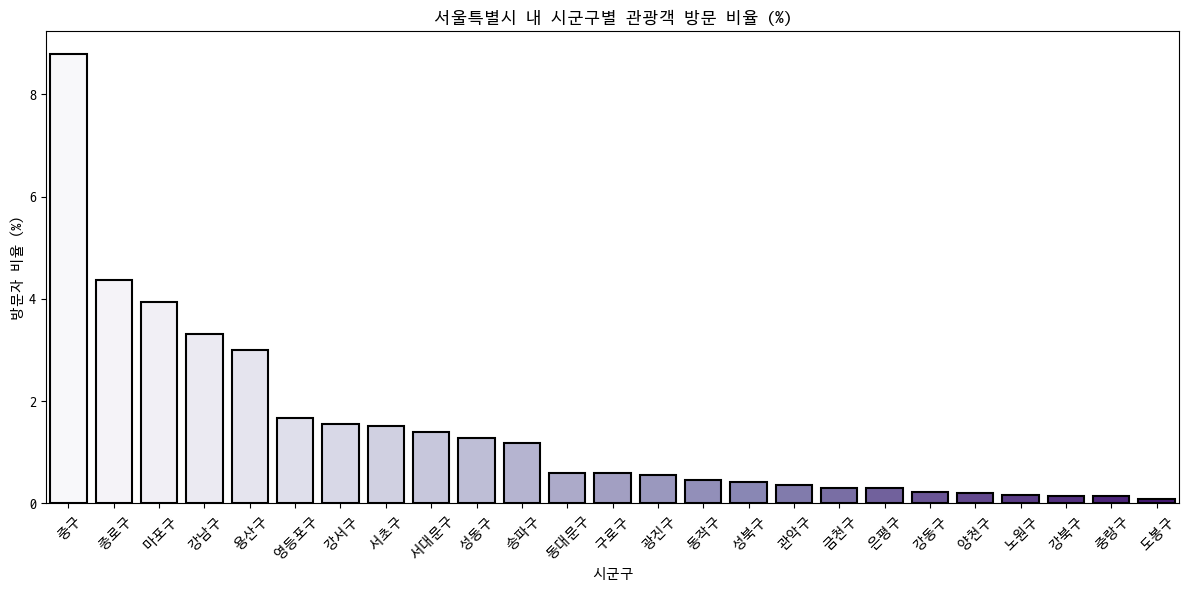

In [210]:
# 3. 시각화 - 막대 그래프
plt.figure(figsize=(12, 6))
sns.barplot(data=seoul_sorted, x='시군구명', y='시군구 방문자 비율', palette='Purples',edgecolor="black", linewidth=1.5)

plt.title('서울특별시 내 시군구별 관광객 방문 비율 (%)')
plt.xlabel('시군구')
plt.ylabel('방문자 비율 (%)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [212]:
pd.read_csv("20250327102926_인기관광지_외지인.csv")

,순위,관광지ID,관광지명,분류
0,1,e5712730c371e5fddd7474df6752b347,롯데백화점본점,백화점
1,2,b708a7a4028a4d59ccc5e7acdde06637,신세계백화점본점,백화점
2,3,d4edfdccdab18d787235c82f7e430fdc,신라호텔서울,호텔
3,4,9fb8dce4c46fe540ea859737971abc3f,신세계백화점본점신관,백화점
4,5,6d51b962202065af6259c46a63e64352,현대시티아울렛동대문점,쇼핑몰
...,...,...,...,...
95,96,e42f0b354c379b16017831de6ea6a075,G3호텔,호텔
96,97,80faf829219f2e544860970b32281c3d,동화상가,시장
97,98,87d0473d57cadb89cdb8b106a3ddfedf,하이커그라운드,전시시설
98,99,e5973c362618362e5d2be49aad5f7a39,이비스스타일앰배서더명동,호텔


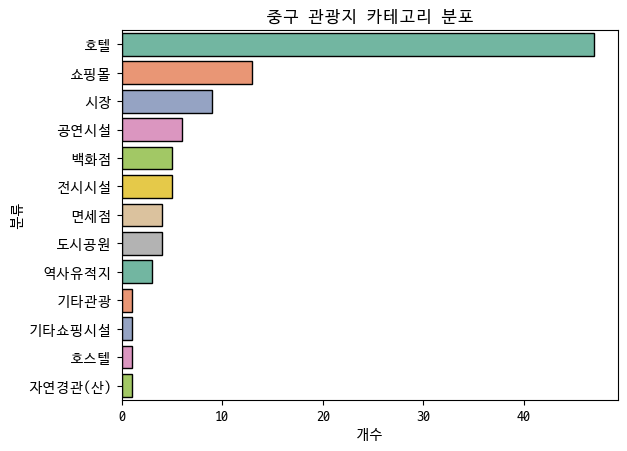

In [216]:
df = pd.read_csv("20250327102926_인기관광지_외지인.csv")
sns.countplot(data=df, y="분류", order=df["분류"].value_counts().index, palette="Set2", edgecolor='black')
plt.title("중구 관광지 카테고리 분포")
plt.xlabel("개수")
plt.ylabel("분류")
plt.show()

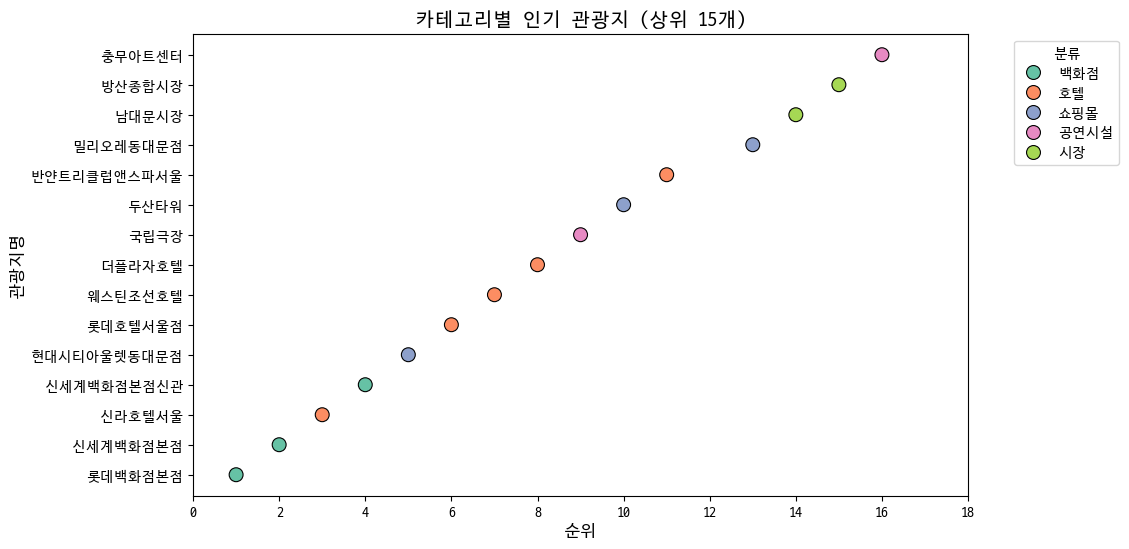

In [270]:
file_path = "20250327102926_인기관광지_외지인.csv"  # 파일 경로 맞게 수정

df = pd.read_csv(file_path)

# 각 카테고리별 상위 5개씩 추출 (최대 15개)

selected_df = df.groupby("분류").head(5).head(15)

# 그래프 크기 설정

plt.figure(figsize=(10, 6))

# 카테고리별 색상 지정하여 산점도 그래프 생성

sns.scatterplot(data=selected_df, x="순위", y="관광지명", hue="분류", palette="Set2", s=100, edgecolor="black")

# 그래프 제목 및 레이블 추가

plt.title("카테고리별 인기 관광지 (상위 15개)", fontsize=14)
plt.xlabel("순위", fontsize=12)
plt.ylabel("관광지명", fontsize=12)
plt.xlim(0, 18)  # x축을 1~100으로 설정
plt.gca().invert_yaxis()  # 관광지명이 위에서부터 정렬되도록 설정

# 범례 위치 조정

plt.legend(title="분류", bbox_to_anchor=(1.05, 1), loc='upper left')

# 그래프 표시

plt.show()

In [278]:
pip install wordcloud matplotlib pandas seaborn

Note: you may need to restart the kernel to use updated packages.


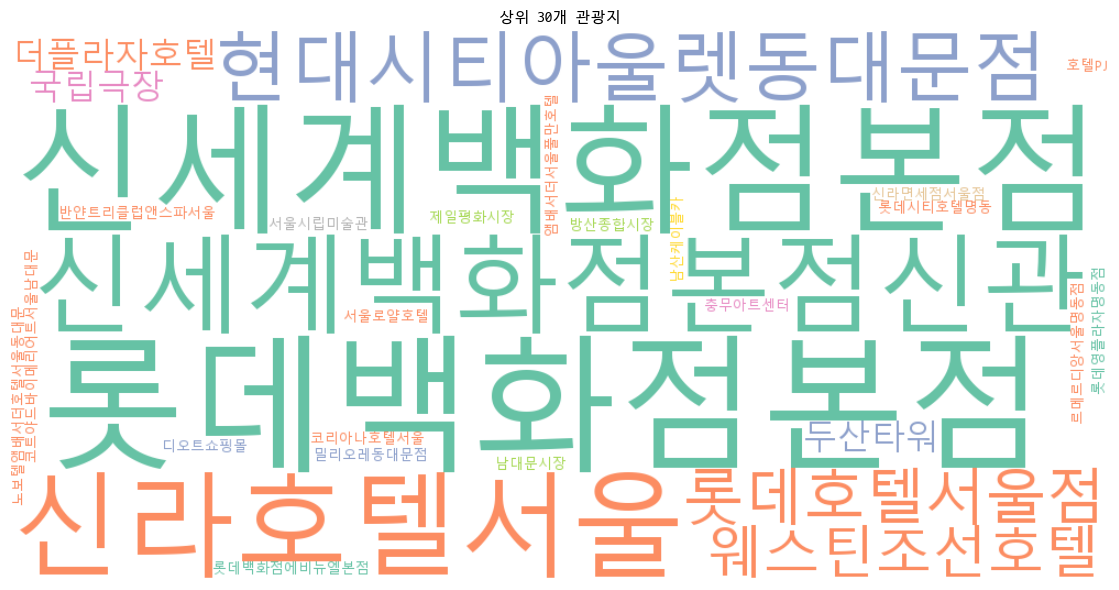

In [296]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import seaborn as sns

# 1. 데이터 불러오기
df = pd.read_csv("20250327102926_인기관광지_외지인.csv")

# 2. 순위 상위 30개 추출
top30 = df.nsmallest(30, '순위').copy()

# 3. 점수 부여 (1등=100, 2등=98, ..., 30등=42)
top30['점수'] = 100 - (top30['순위'] - 1) * 2

# 4. 분류별 색상 지정
categories = top30['분류'].unique()
palette = sns.color_palette("Set2", len(categories))
category_colors = {cat: tuple([int(c * 255) for c in color]) for cat, color in zip(categories, palette)}

# 5. 단어별 색상 매핑용 함수
def color_func(word, *args, **kwargs):
    category = top30[top30['관광지명'] == word]['분류'].values[0]
    return category_colors.get(category, (0, 0, 0))

# 6. 워드클라우드 생성
word_freq = top30.set_index('관광지명')['점수'].to_dict()
font_path = "C:/Windows/Fonts/malgun.ttf"  # 또는 시스템에 맞는 한글 폰트 경로

wordcloud = WordCloud(
    font_path=font_path,
    width=1000,
    height=500,
    background_color='white'
).generate_from_frequencies(word_freq)

# 7. 색상 입히기
wordcloud.recolor(color_func=color_func)

# 8. 시각화
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("상위 30개 관광지", fontsize=11)
plt.tight_layout()
plt.show()
